## Great, now that we discussed a little let's continue

Given that the current approach utilized by the authors lacks reproducibility, we will explore an alternative method by leveraging nf-core pipelines for data analysis.

Please explain, how we will achieve reproducibility for the course  with this approach.


The idea is to freeze what we run (pipeline revision), how we run it (parameters/config), and what it runs with (container images), and save this to machine-readable provenance reports. Anyone can re-run and obtain the same results on any machine that supports Nextflow then.

You have successfully downloaded 2 of the fastq files we will use in our study.

What is the next step if we want to first have a count table and check the quality of our fastq files? What is the pipeline called to do so?

Next: quality control. Generate gene-level count table.
The pipeline is called rnaseq.

Analyze the 2 files using an nf-core pipeline.

What does this pipeline do?

Which are the main tools that will be used in the pipeline?

pipeline takes raw FASTQ files.
1. Preprocessing: FastQC (among others)
2. Genome alignment & quantification: STAR/HISAT2, RSEM, Salmin, UMI-tools dedup
3. (simultanously to 2.) Pseudo alignment and quantification
4. Post-processing: SAMtools, picard, BEDtools, stringTie
5. Final QC: RSeQc, Preseq, Qualimap, dupRadar, DESeq2
output= gene-level count matrix with quality reports

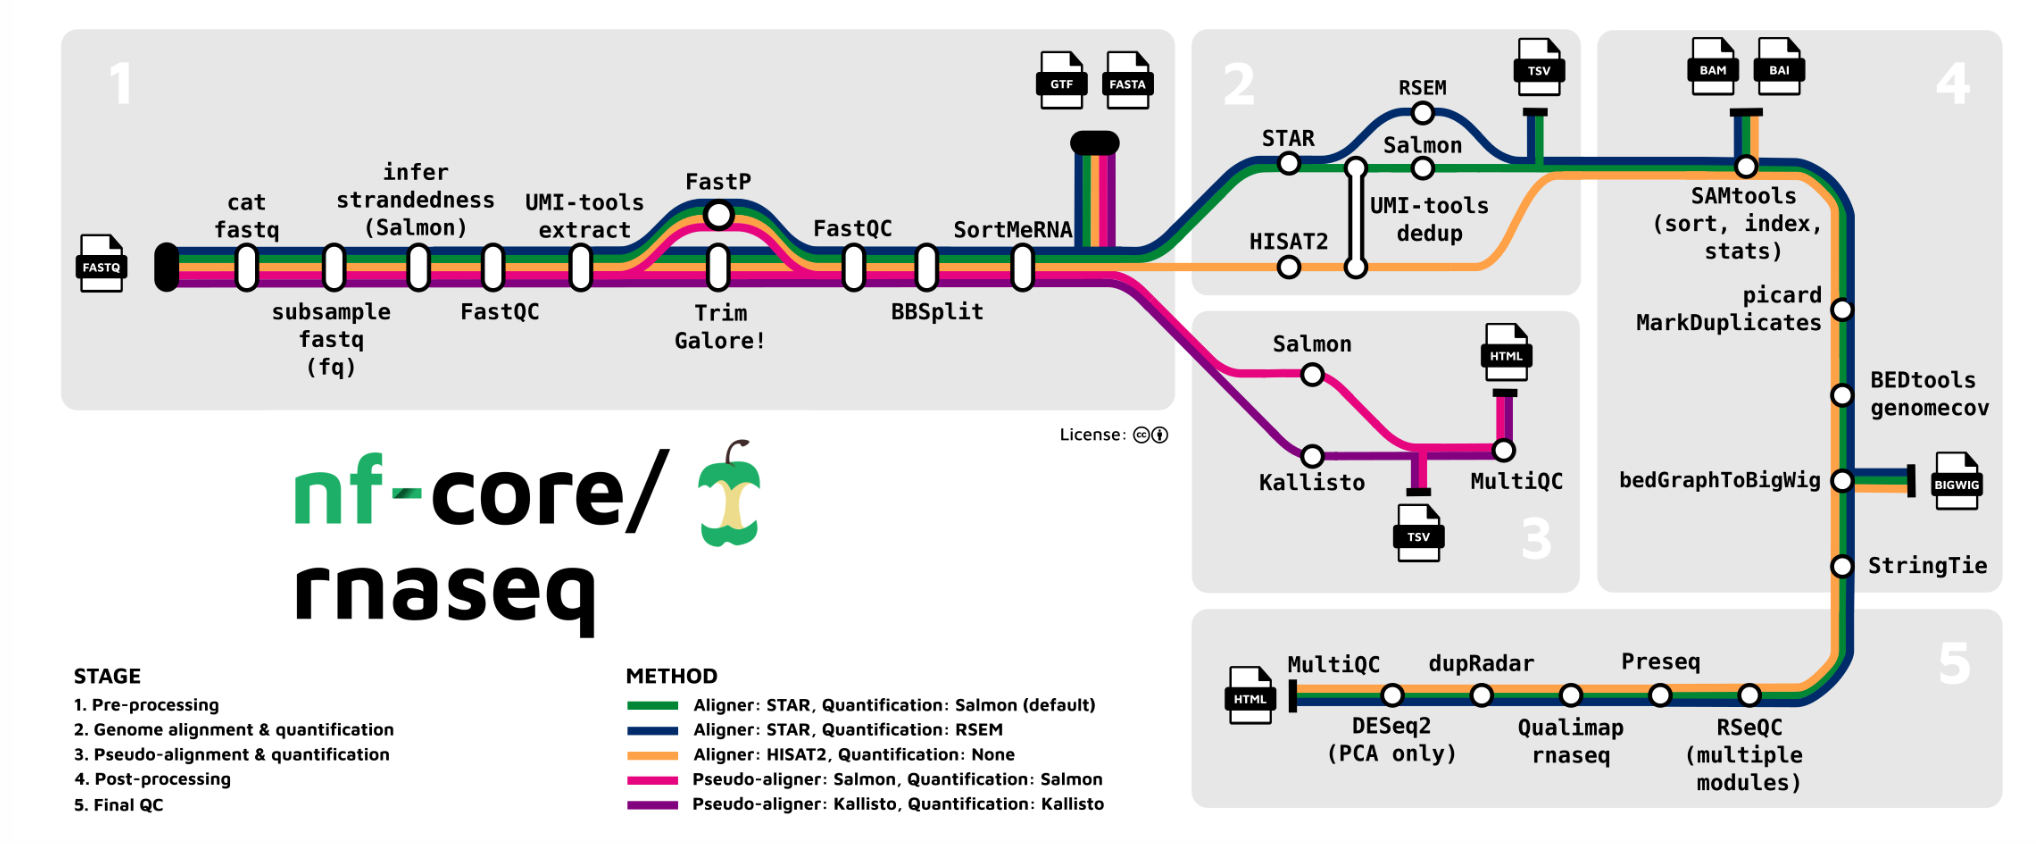

As all other nf-core pipelines, the chosen pipeline takes in a samplesheet as input.

Use Python and pandas to create the samplesheet for your 2 samples. Feel free to make use of the table you created earlier today.

Choose your sample names wisely, they must be the connection of the results to the metadata. If you can't find the sample in the metadata later, the analysis was useless.

In [8]:
# post here the command you used to run nf-core/rnaseq

!nextflow run nf-core/rnaseq \
  --input "/Users/sophiag/Documents/Dokumente/Studium/Master/FS4/ComputationalWorkflows/computational-workflows-2025/notebooks/day_02/SRFetch_results/samplesheet/samplesheet_fixed.csv" \
  --outdir "./rnaseq_results" \
  --genome GRCm38  \
  --aligner hisat2 \
  --max_memory '8.GB' \
  -profile docker \
  -resume


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/rnaseq` [happy_goodall] DSL2 - revision: 9738a2df42 [master]


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/rnaseq 3.21.0
------------------------------------------------------
Input/output options
  input              : /Users/sophiag/Documents/Dokumente/Studium/Master/FS4/ComputationalWorkflows/computational-workflows-2025/notebooks/day_02/SRFetch_results/samplesheet/samplesheet_fixed.csv
  outdir             : ./rnaseq_results

Reference genome options
  genome             : GRCm38
  fasta              : s3://ngi-igenomes/igenomes//Mus_musculus/Ensembl/GRCm38/Sequence/WholeGenomeFasta/genome.fa
  gtf                : s3://ngi-igenomes/igenomes//M

Explain all the parameters you set and why you set them in this way.



!nextflow run nf-core/rnaseq \      specifies nf-core/rnaseq pipeline.  
  --input "path" \                  this is the sample sheet created by nf-core/fetchngs describing your runs.  
  --outdir "path" \                 this is the specified output path.  
  --genome Mmul_1  \                the selected genome. Here: mus musculus.  
  --aligner hisat2 \                defines aligner choice.  
  --max_memory '8.GB' \             specifies available memory to work with.  
  -profile docker \                 uses Docker containers so the exact software versions are reproducible.  
  -resume                           specifies to resume when run was interrupted.  
  
  

## Browsing the results

How did the pipeline perform?

not at all

Explain the quality control steps. Are you happy with the quality and why. If not, why not.
Please give additional information on : 
- ribosomal rRNA
- Duplication
- GC content

What are the possible steps that could lead to poorer results?

- rRNA: makes up most part of RNA, should be depleted in library prep. Quality is good when rRNA is low
- Duplication: due to biological reasons (high expression of transcript) or technical (PCR amplification bias). Some duplicates are normal, very high duplications suggest technical problems
- GC content: distribution of G and C bases across reads. Deviations indicate contamination.

Would you exclude any samples? If yes, which and why?

hard to decide because run didnt finish.
e.g. runs with very high rRNA contamination, extreme duplication, low mapping rate, severe GC bias, ...

What would you now do to continue the experiment? What are the scientists trying to figure out? Which packages on R or python would you use?

Continue with Differential Expression run per region with multiple testing control.

objectives: 
- how does oxycodone withdrawal alter gene expression?
- how does chronic neuropathic pain modify withdrawal changes?
- HDAC1/2-mediated regulation consistent with obbserved changes?

Packages e.g.: DESeq2